In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import sentence_bleu
from core.solver import CaptioningSolver
from core.model import CaptionGenerator
from core.utils import load_coco_data, decode_captions
from core.bleu import evaluate

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
data = load_coco_data(data_path='./data', split='train')
word_to_idx = data['word_to_idx']

image_idxs <type 'numpy.ndarray'> (400131,) int32
captions <type 'numpy.ndarray'> (400131, 17) int32
word_to_idx <type 'dict'> 24352
features <type 'numpy.ndarray'> (82783, 196, 512) float32
file_names <type 'numpy.ndarray'> (82783,) <U31
elapse time: 24.33


In [4]:
mem_cap = data['captions']
mem_idx = data['image_idxs']

In [8]:
data['captions'] = mem_cap[0:10000]
data['image_idxs'] = mem_idx[0:10000]

In [ ]:
#data['features'] = data['features']/

In [9]:
model = CaptionGenerator(word_to_idx, dim_feature=[196, 512], dim_embed=512,
                                   dim_hidden=512, n_time_step=16, cell_type='lstm')

In [32]:
solver = CaptioningSolver(model, data, n_epochs=40, batch_size=128, update_rule='adam',
                                      learning_rate=0.001, print_every=75, save_every=20, image_path='./image/train2014_resized',
                                pretrained_model=None, model_path='./model/lstm', test_model='./model/lstm/model-40', test_batch_size=100,
                                 candidate_caption_path='./data/', test_image_path='./image/val2014_resized')

In [16]:
solver.train()

num epochs: 40
iterations per epoch: 78
data size: 10000
batch size: 128

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Initial Train Loss: 14283.82324
Generated Caption: plugging workspace littler littler forground pendulum paintigs serious? corgy burned corgy horizon littler forground pendulum paintigs serious? corgy burned corgy
Generated Caption: plugging plugging targeted plugging inbetween quizzical tube smokey six-legged tv> orages orages orages orages molded smokey six-legged six-legged corgy al
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

Ground Truth 1: <START> a young girl has fallen trying to ski in the snow <END>
Ground Truth 1: <START> a child wearing skis on its back on the ground <END>
Ground Truth 1: <START> there is a child on skis laying in the snow <END>
Ground Truth 1: <START> a person that is laying in the snow <END>
Ground Trut

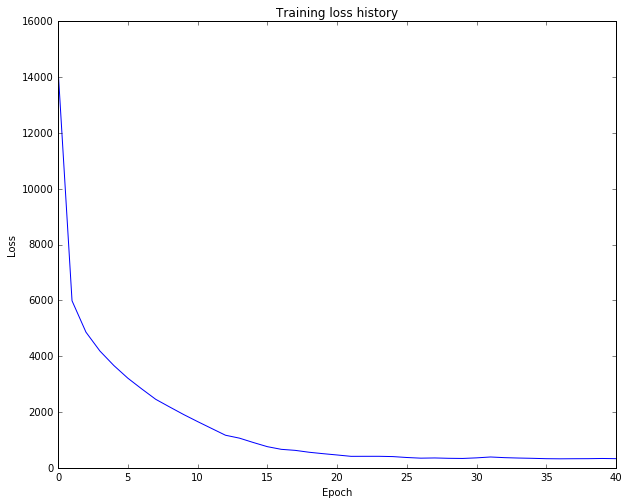

In [17]:
# Plot the training losses
plt.plot(solver.loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss history')
plt.show()

Sampled Caption: a rusty boat sitting in the water of a lake <END>


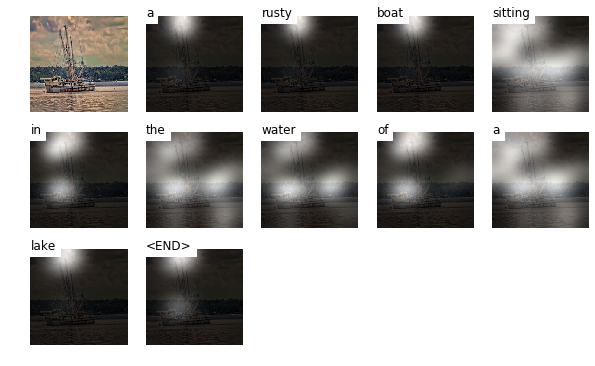

Sampled Caption: a man stands next to a sign in a forested area while holding a frisbee <END>


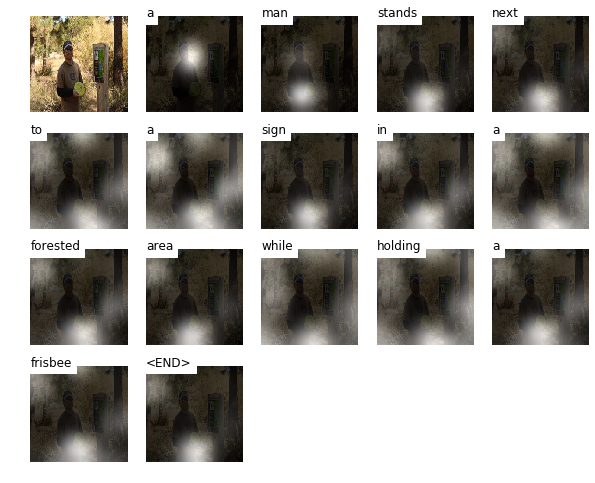

Sampled Caption: a close-up photo of a sign saying boneless bananas <END>


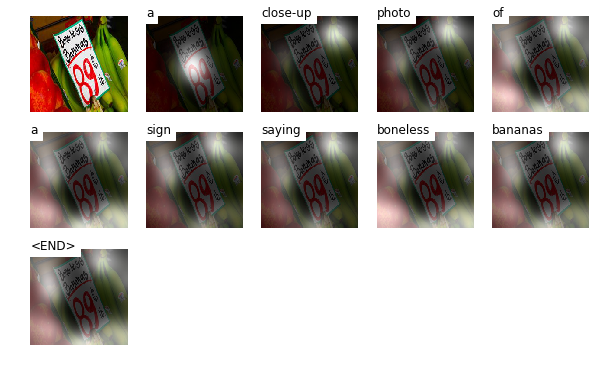

Sampled Caption: three urinals line a tiled wall in a restroom <END>


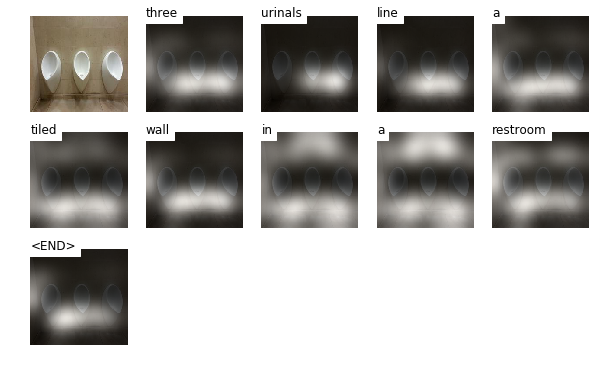

Sampled Caption: a cake is nicely doecarted and prepared inside <END>


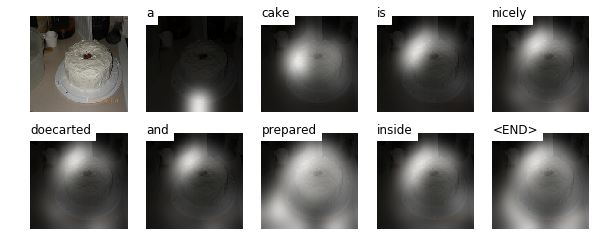

Sampled Caption: a man holding up a bathroom with a couch with large lighted like decorations <END>


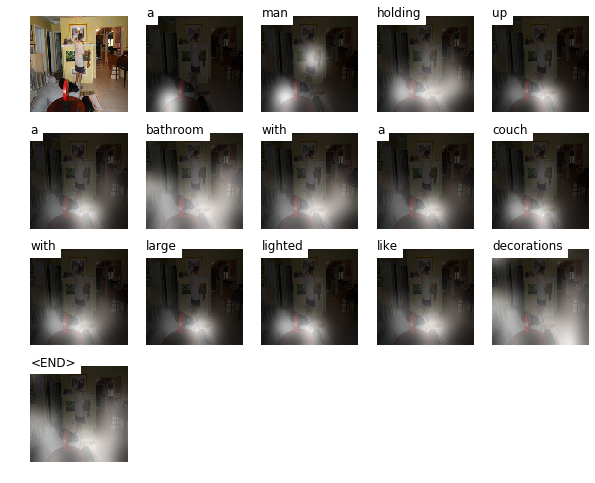

Sampled Caption: a bus with an advertisement and a yellow hummer behind it <END>


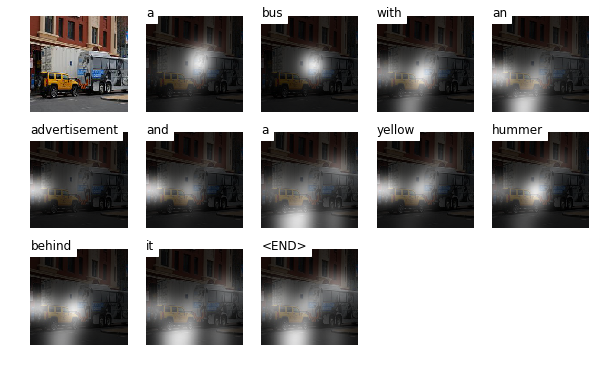

Sampled Caption: assortment of dessert items on display on table <END>


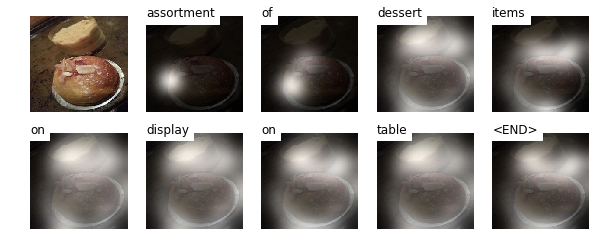

Sampled Caption: a man that is jumping in the air with a skateboard <END>


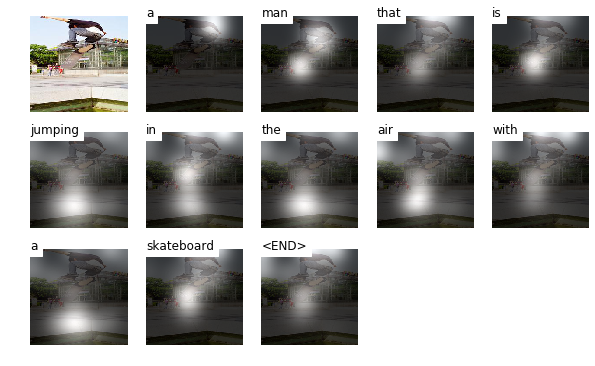

Sampled Caption: a clock tower is lit up so everyone can read it <END>


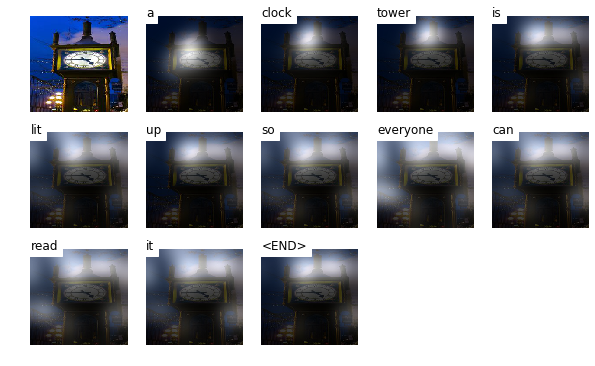

In [11]:
# sampled captions and visualize attention weigths for train dataset
solver.test(data)

In [12]:
# load validation dataset
val_data = load_coco_data(data_path='./data', split='val')

image_idxs <type 'numpy.ndarray'> (24210,) int32
captions <type 'numpy.ndarray'> (24210, 17) int32
features <type 'numpy.ndarray'> (5000, 196, 512) float32
file_names <type 'numpy.ndarray'> (5000,) <U29
elapse time: 1.50


Sampled Caption: a small couple of zebras standing on a dry grass field <END>


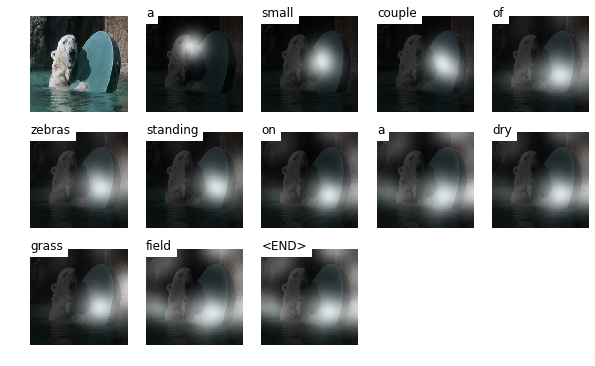

Sampled Caption: a woman is shopping in a kitchen <END>


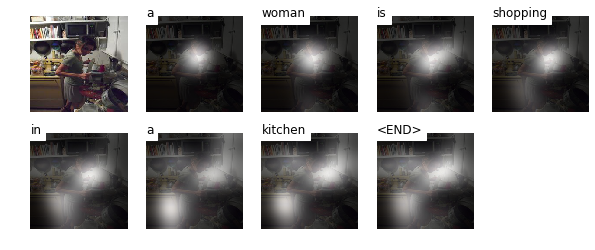

Sampled Caption: a man holding a frisbee in his mouth <END>


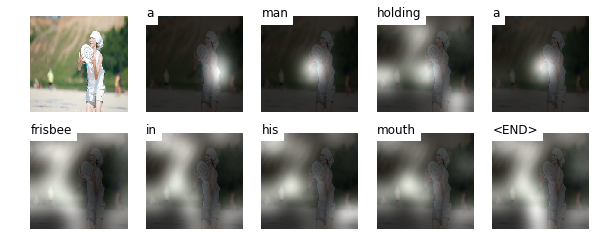

Sampled Caption: a little boy is taking off of an airplane at a runway <END>


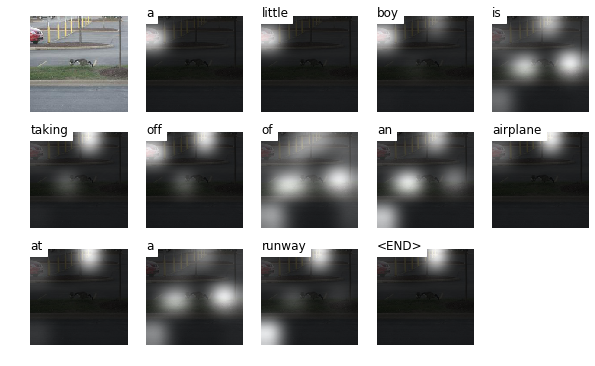

Sampled Caption: a woman is shopping in a kitchen <END>


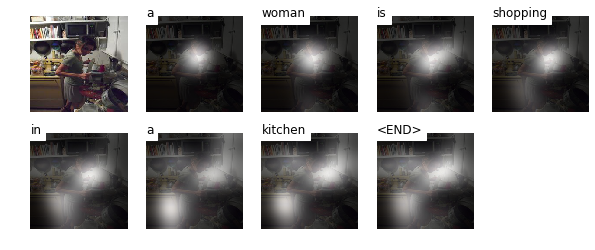

Sampled Caption: a number of people walking around a building with a cross walk <END>


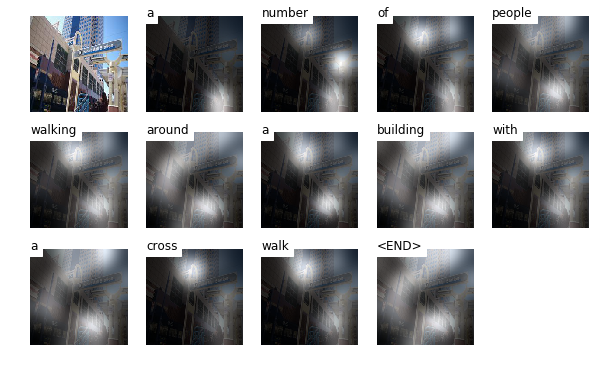

Sampled Caption: a number of large air planes at a show <END>


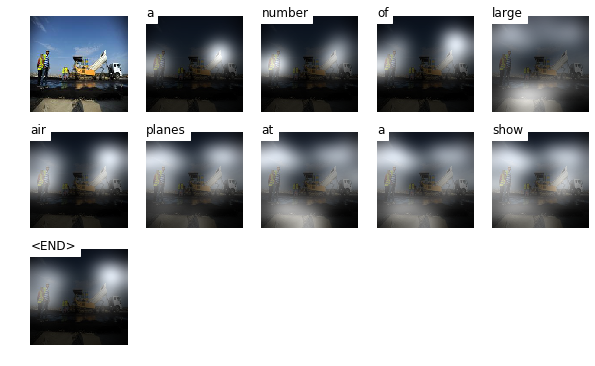

Sampled Caption: a person on a skate board riding a surfboard <END>


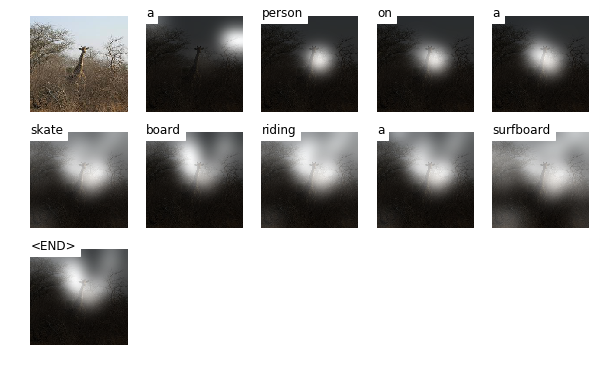

Sampled Caption: a couple of men sitting on top of a dirt road <END>


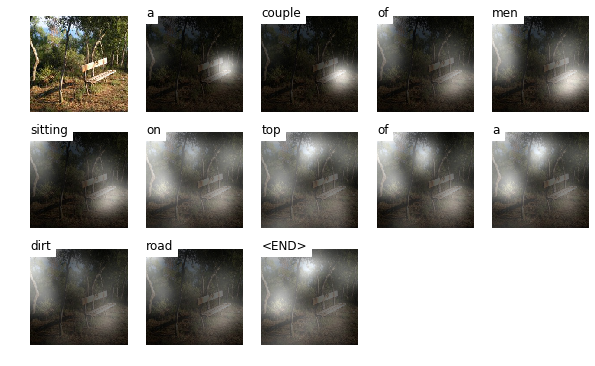

Sampled Caption: a bathroom has toilet and shower sink <END>


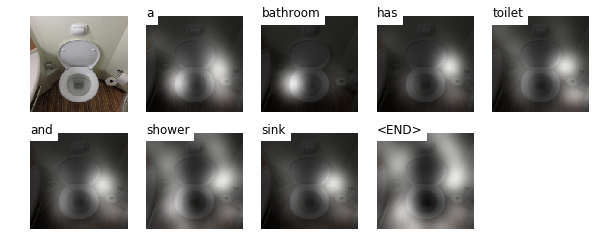

saved val.candidate.captions.pkl..


In [13]:
# sampled captions and visualize attention weights for validation dataset
solver.test(val_data, split='val')

In [25]:
# load test dataset
test_data = load_coco_data(data_path='./data', split='test')

image_idxs <type 'numpy.ndarray'> (24162,) int32
captions <type 'numpy.ndarray'> (24162, 17) int32
features <type 'numpy.ndarray'> (5000, 196, 512) float32
file_names <type 'numpy.ndarray'> (5000,) <U29
elapse time: 1.55


Sampled Caption: a person is holding up a close up of a person <END>


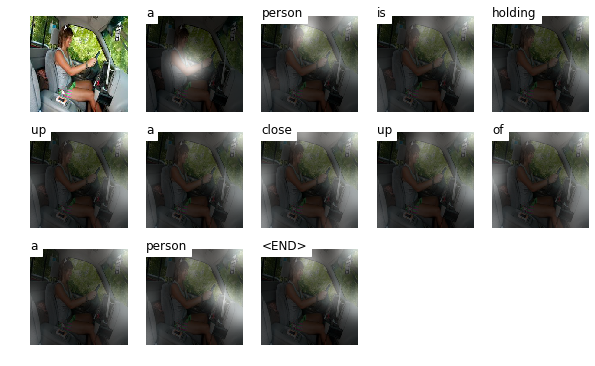

Sampled Caption: a white plate topped with a breakfast sandwich and a cup of coffee <END>


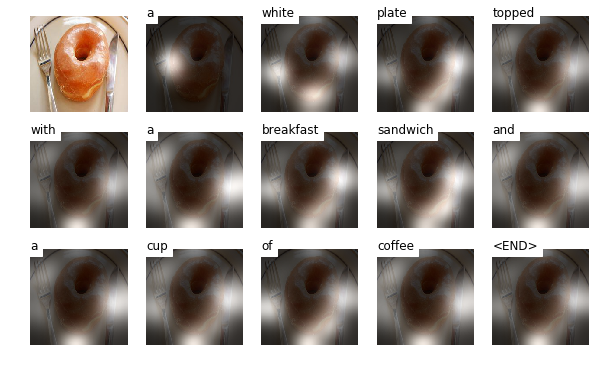

Sampled Caption: a horse that is walking in front of a fence <END>


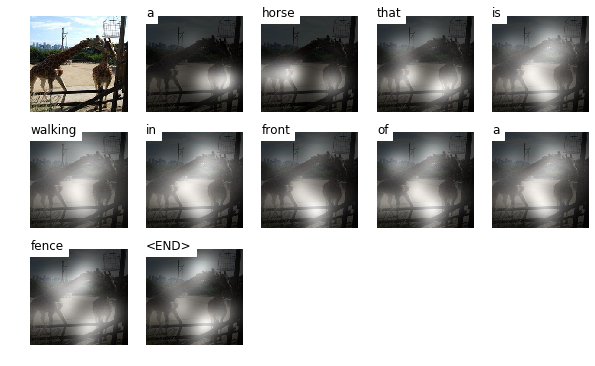

Sampled Caption: three snowboarders in a row of snow animals <END>


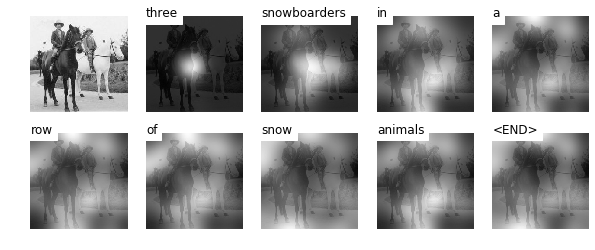

Sampled Caption: a man laying down in the doorway of a bathroom near two couches <END>


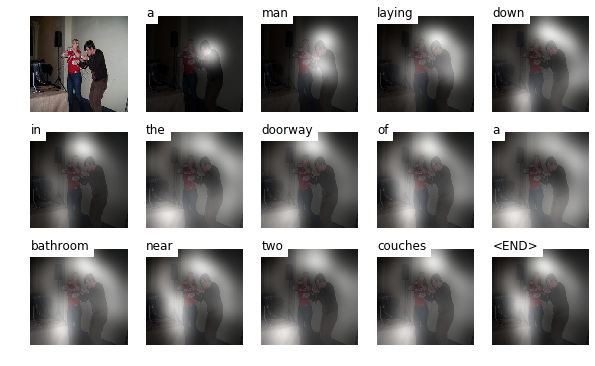

Sampled Caption: a person on a surfboard in the middle of a mountain <END>


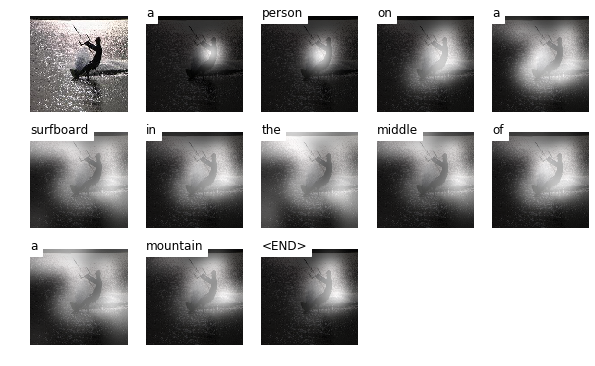

Sampled Caption: a large group of young girls playing games with wii in front of buildings <END>


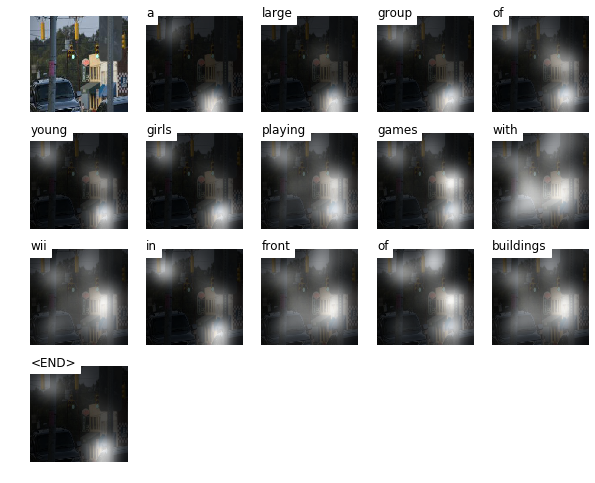

Sampled Caption: a large commercial laptop is parked on a table <END>


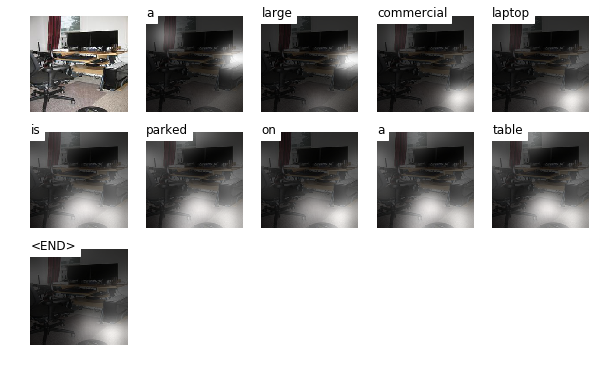

Sampled Caption: a group of people behind a clock and another man <END>


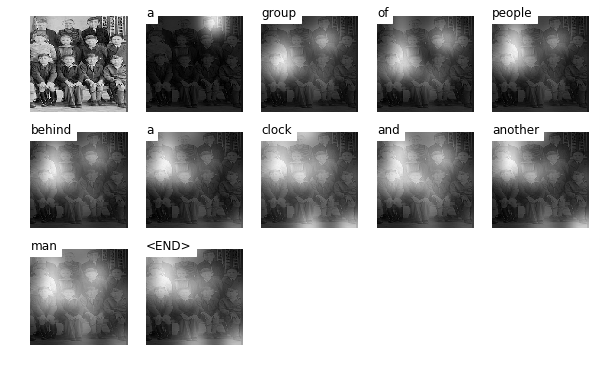

Sampled Caption: a man is playing frisbee in a field <END>


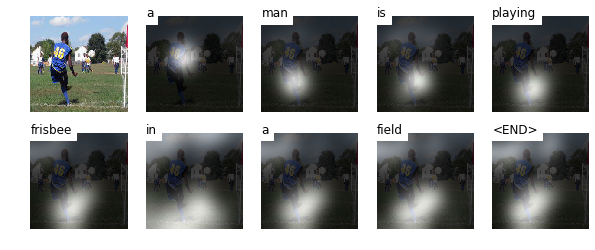

saved test.candidate.captions.pkl..


In [33]:
# sampled captions and visualize attention weights for validation dataset
solver.test(test_data, split='test')

In [34]:
# BLUE score for validation dataset
evaluate(data_path='./data', split='val')

BLEU1: 0.430052
BLEU2: 0.207027
BLEU3: 0.077857
BLEU4: 0.027781


In [35]:
# BLUE score for validation dataset
evaluate(data_path='./data', split='test')

BLEU1: 0.427241
BLEU2: 0.204983
BLEU3: 0.077103
BLEU4: 0.028952
